In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pandas
import pynumdiff
import scipy.fftpack
from IPython.display import display,SVG
import figurefirst
fifi = figurefirst

import run_pareto_plot

In [149]:
# define problem
example = 'example_7'
dt = 0.01
noise = 0.25
timeseries_length = 4
problem = 'lorenz_x'
read_existing = True
simdt = 0.0001

# define method
method_parent = 'linear_model'
method = 'savgoldiff'

In [150]:
r = pynumdiff.utils.simulate.lorenz_x(timeseries_length=timeseries_length, 
                                  noise_parameters=[0, noise], 
                                  dt=dt)

In [151]:
x, x_truth, dxdt_truth, _ = r
t = np.arange(0, timeseries_length, dt)
print('done simulating')

done simulating


In [152]:
gamma_range = [1e-4, 1e4]
r = run_pareto_plot.get_pareto_plot_data(x, x_truth, dxdt_truth, dt, method, method_parent, gamma_range, 
                                         num_gammas=60)
rmses, errcorrs, tvs, rmses_gamma, errcorrs_gamma, tvs_gamma, params_gamma, successful_gammas = r

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

In [153]:
threshold = 0.25
while len(np.where(errcorrs_gamma<threshold)[0]) < 1:
    threshold += 0.05

idx_errcorr_okay = np.where(errcorrs_gamma<threshold)

idx_opt =  idx_errcorr_okay[0][np.argmin(rmses_gamma[idx_errcorr_okay])]

opt_rmse = rmses_gamma[idx_opt]
opt_errcorr = errcorrs_gamma[idx_opt]



In [164]:
print(idx_opt)

20


(0, 1)

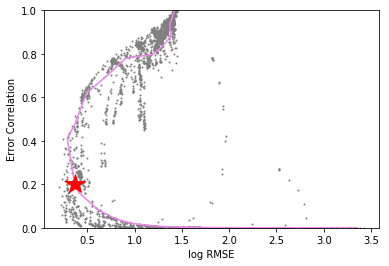

In [154]:
plt.plot(np.log(rmses), errcorrs, '.', color='gray', markersize=2)
plt.plot(np.log(rmses_gamma), errcorrs_gamma, color='violet')
plt.ylim(0,1)

plt.plot(np.log(opt_rmse), opt_errcorr, '*', color='red', markersize=20)

plt.xlabel('log RMSE')
plt.ylabel('Error Correlation')

#plt.xlim(0.4, 3)
plt.ylim(0,1)

In [161]:
q1 = np.diff(errcorrs_gamma) / np.diff(np.log(rmses_gamma)) 

/home/caveman/BMD2/lib/python3.5/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


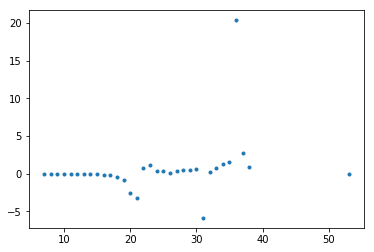

In [162]:
plt.plot(q1, '.')

20


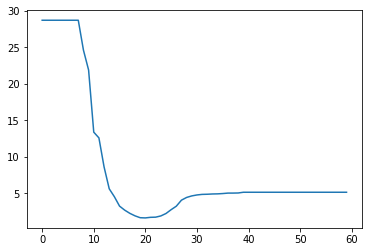

In [168]:
plt.plot(rmses_gamma + errcorrs_gamma)
print( np.argmin(np.log(rmses_gamma) + errcorrs_gamma) )

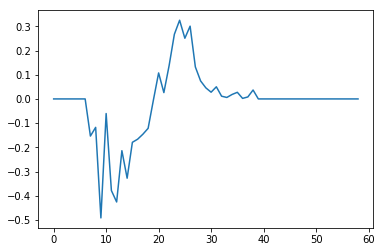

In [166]:
plt.plot( np.diff(np.log(rmses_gamma) + errcorrs_gamma) )

22


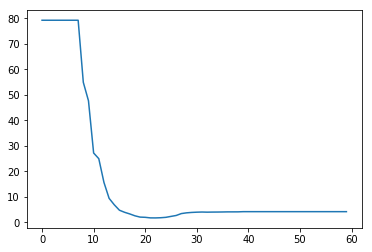

In [165]:
plt.plot( rmses_gamma + tvs_gamma )
print( np.argmin(rmses_gamma + tvs_gamma) )

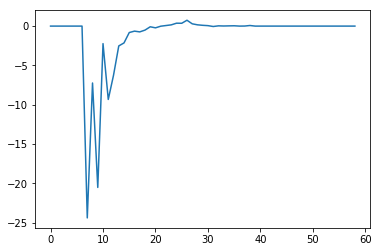

In [167]:
plt.plot( np.diff(rmses_gamma + tvs_gamma) )

(0, 1)

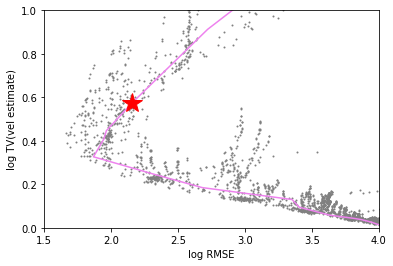

In [142]:
plt.plot((rmses), (tvs), '.', color='gray', markersize=2)
plt.plot((rmses_gamma), (tvs_gamma), color='violet')
#plt.ylim(0,1)


plt.plot((opt_rmse), (tvs_gamma[idx_opt]), '*', color='red', markersize=20)

plt.xlabel('log RMSE')
plt.ylabel('log TV(vel estimate)')

plt.xlim(1.5, 4)
plt.ylim(0,1)

Text(0,0.5,'Error Correlation')

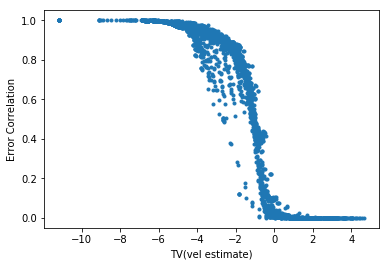

In [115]:
plt.plot(np.log(tvs), errcorrs, '.')
plt.xlabel('TV(vel estimate)')
plt.ylabel('Error Correlation')